In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [10]:
data = pd.read_csv(r"C:\Users\yedla\Downloads\RTA Dataset.csv")

In [11]:
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [13]:
data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [15]:
data.duplicated().sum()

np.int64(0)

In [16]:
data.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [20]:
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')


data['h'] = data['Time'].dt.hour
data['m'] = data['Time'].dt.minute
data['s'] = data['Time'].dt.second
data

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,h,m,s
0,1900-01-01 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17,2,0
1,1900-01-01 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17,2,0
2,1900-01-01 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17,2,0
3,1900-01-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1,6,0
4,1900-01-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,1900-01-01 16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,16,15,0
12312,1900-01-01 18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,18,0,0
12313,1900-01-01 13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury,13,55,0
12314,1900-01-01 13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,13,55,0


In [21]:
data = data.drop(columns=['m','s'])
data

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,h
0,1900-01-01 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,1900-01-01 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,1900-01-01 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,1900-01-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,1900-01-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,1900-01-01 16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,16
12312,1900-01-01 18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,18
12313,1900-01-01 13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury,13
12314,1900-01-01 13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,13


In [22]:
day_list = []
for i in data['h']:
    if i > 8:
        day_list.append('Night')
    else:
        day_list.append('Day')
data['Day'] = day_list
data

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,h,Day
0,1900-01-01 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17,Night
1,1900-01-01 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17,Night
2,1900-01-01 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17,Night
3,1900-01-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1,Day
4,1900-01-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,1900-01-01 16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,16,Night
12312,1900-01-01 18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,18,Night
12313,1900-01-01 13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury,13,Night
12314,1900-01-01 13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,13,Night


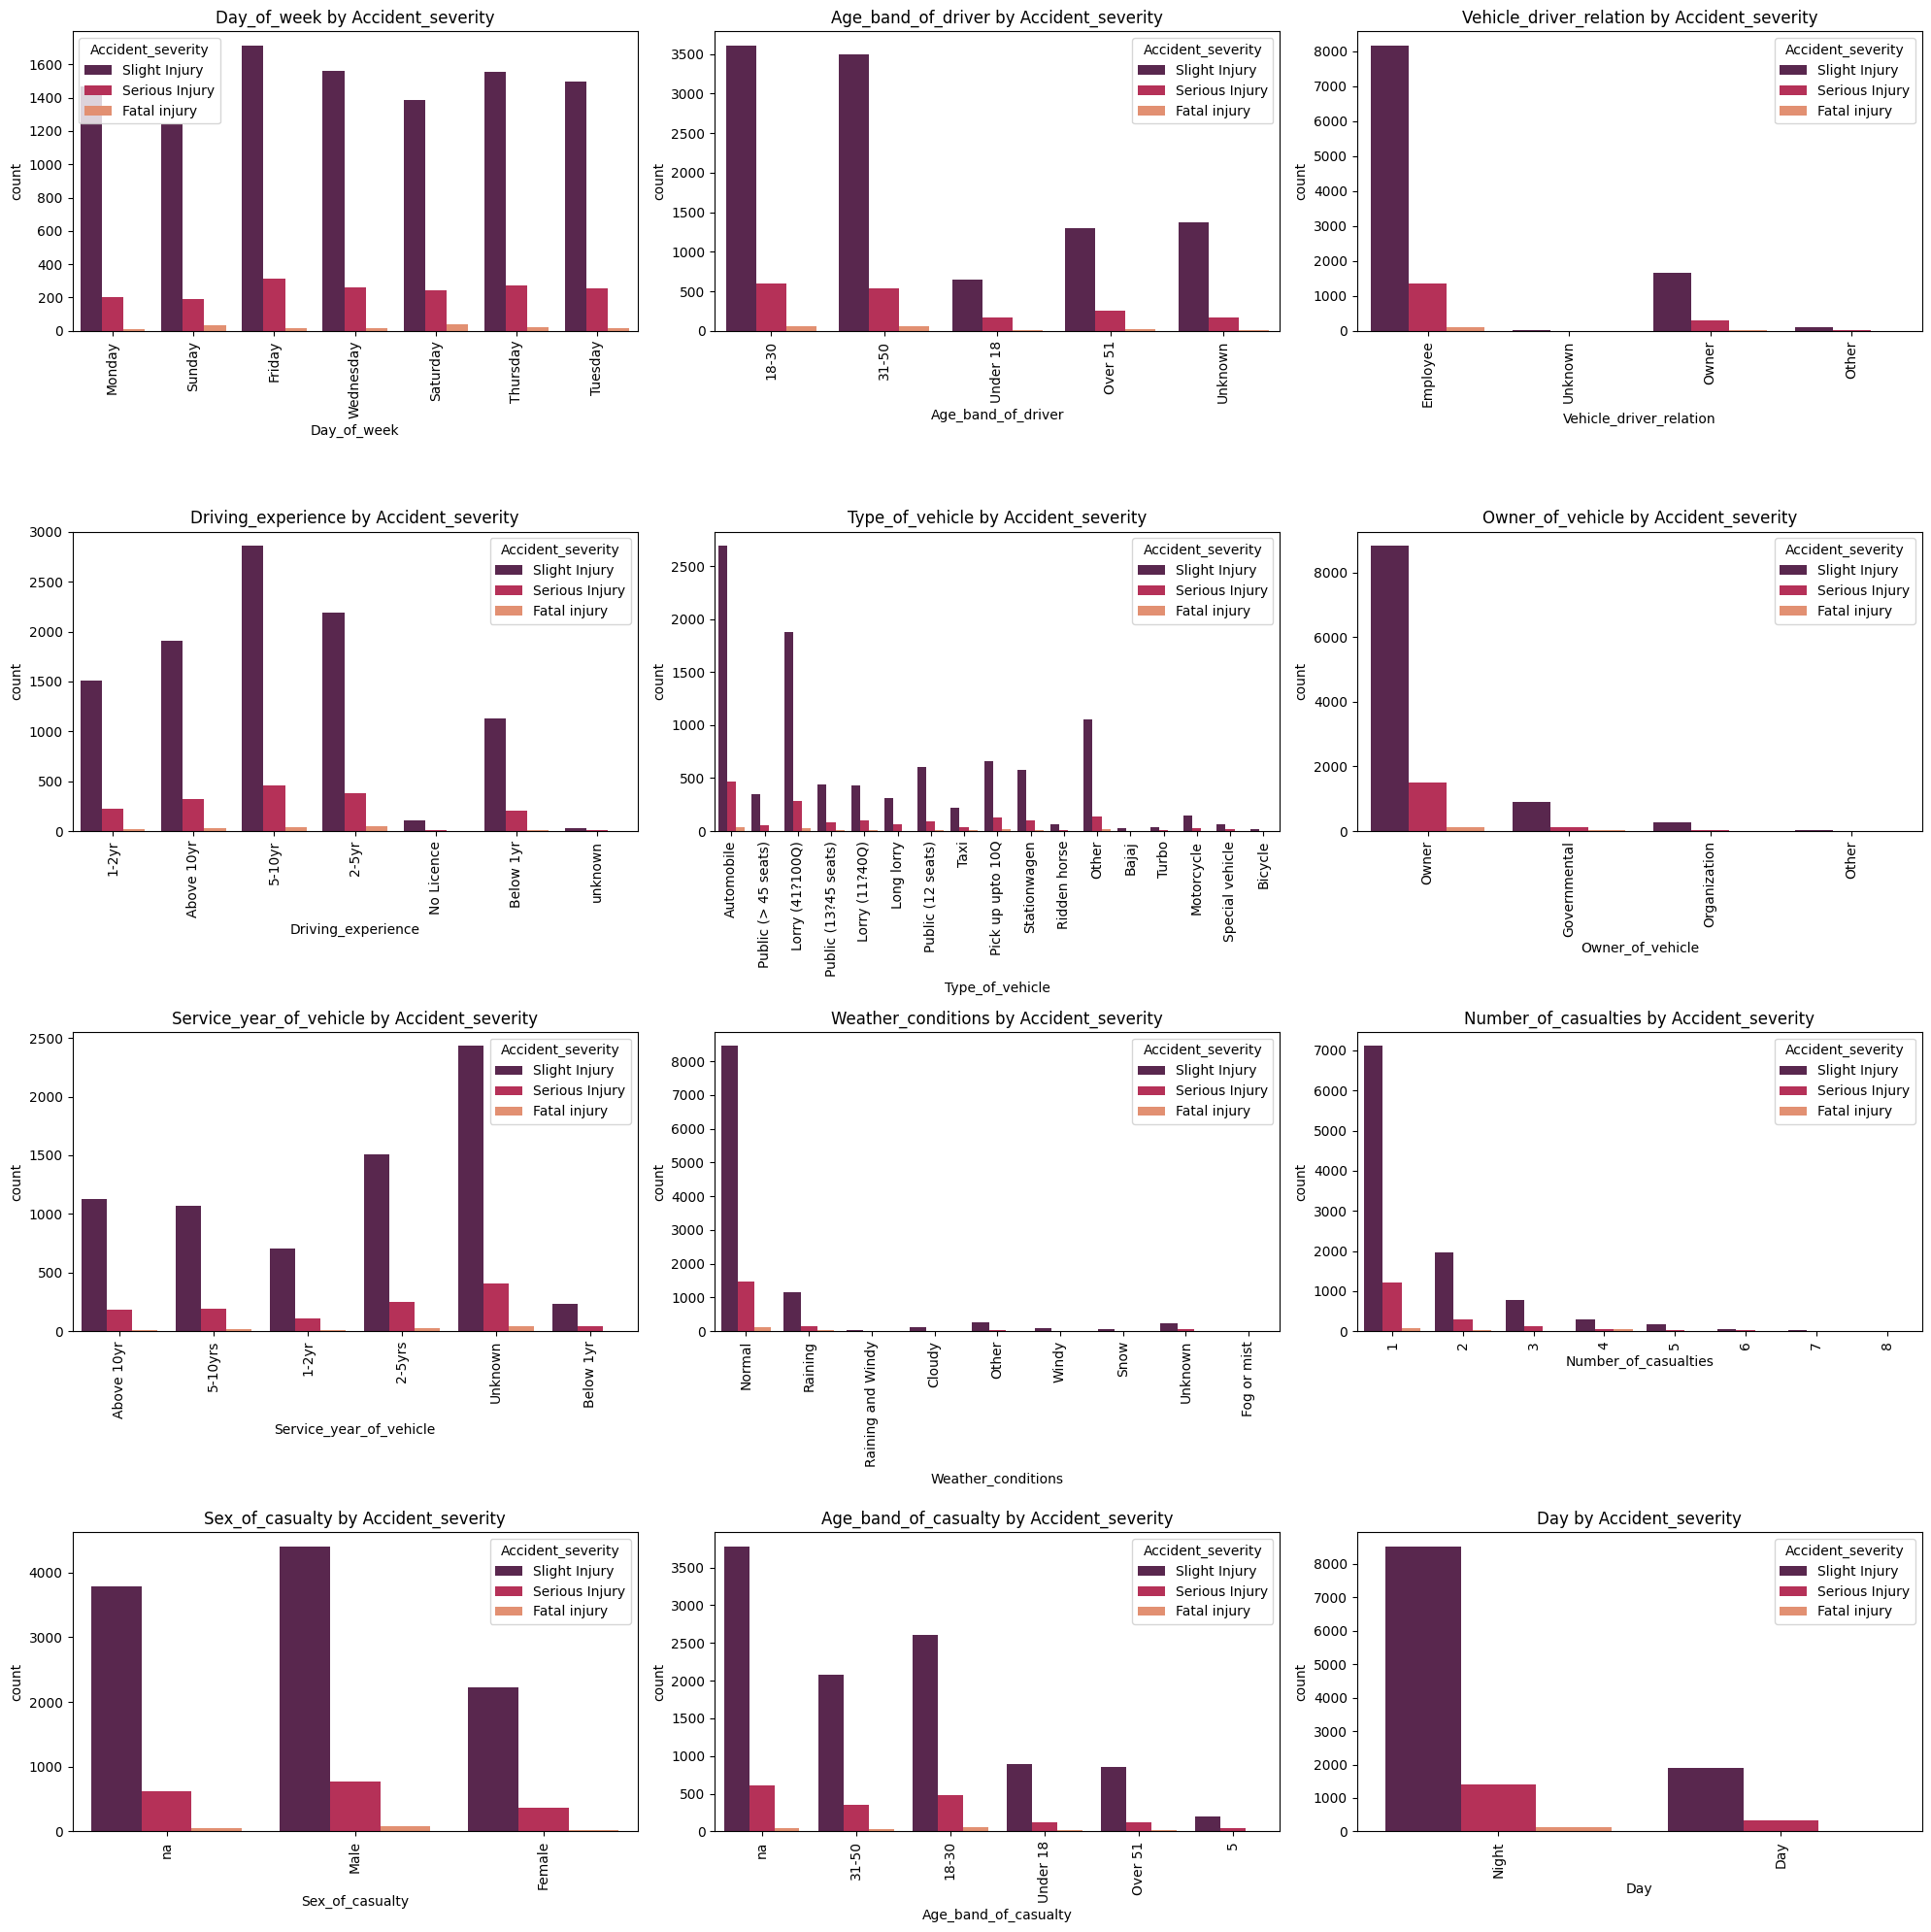

In [24]:
columns_to_plot = ['Day_of_week', 'Age_band_of_driver', 'Vehicle_driver_relation', 'Driving_experience', 
                   'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle','Weather_conditions','Number_of_casualties','Sex_of_casualty','Age_band_of_casualty','Day']
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.countplot(x=col, hue="Accident_severity", data=data, palette='rocket', ax=axes[i])
    axes[i].set_title(f"{col} by Accident_severity")
    axes[i].tick_params(axis='x', rotation=90)

for j in range(len(columns_to_plot), 12):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

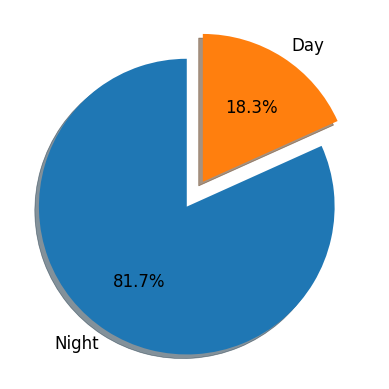

In [26]:
plt.pie(data['Day'].value_counts(), labels=data['Day'].unique(), autopct='%1.1f%%',
            startangle=90, wedgeprops={'linewidth': 0.5}, textprops={'fontsize': 12},
            explode=[0.1,0.1], shadow=True)
plt.show()

<Axes: xlabel='h', ylabel='count'>

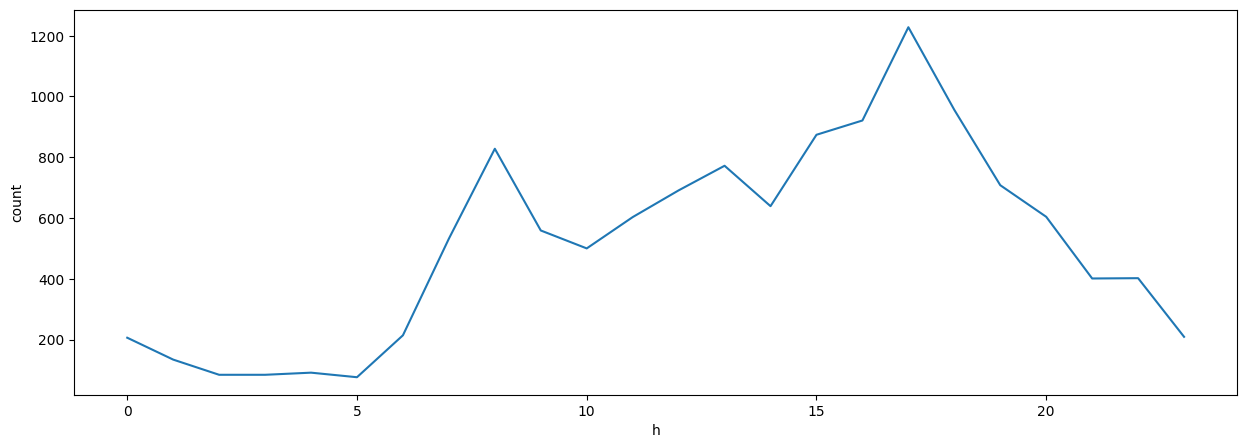

In [27]:
plt.figure(figsize=(15,5))
sns.lineplot(data['h'].value_counts())

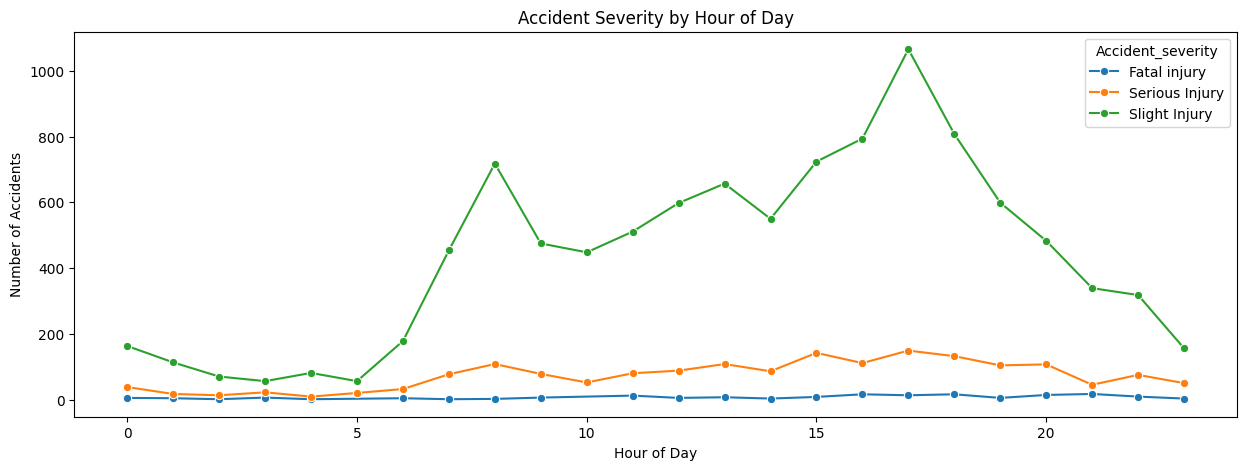

In [28]:
data_grouped = data.groupby(['h', 'Accident_severity']).size().reset_index(name='counts')

plt.figure(figsize=(15, 5))
sns.lineplot(x='h', y='counts', hue='Accident_severity', data=data_grouped, marker="o")

plt.title("Accident Severity by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.show()

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         12316 non-null  datetime64[ns]
 1   Day_of_week                  12316 non-null  object        
 2   Age_band_of_driver           12316 non-null  object        
 3   Sex_of_driver                12316 non-null  object        
 4   Educational_level            11575 non-null  object        
 5   Vehicle_driver_relation      11737 non-null  object        
 6   Driving_experience           11487 non-null  object        
 7   Type_of_vehicle              11366 non-null  object        
 8   Owner_of_vehicle             11834 non-null  object        
 9   Service_year_of_vehicle      8388 non-null   object        
 10  Defect_of_vehicle            7889 non-null   object        
 11  Area_accident_occured        12077 non-nu

In [30]:
for i in data.columns:
    data[i]= data[i].astype('category').cat.codes.astype(int)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Time                         12316 non-null  int64
 1   Day_of_week                  12316 non-null  int64
 2   Age_band_of_driver           12316 non-null  int64
 3   Sex_of_driver                12316 non-null  int64
 4   Educational_level            12316 non-null  int64
 5   Vehicle_driver_relation      12316 non-null  int64
 6   Driving_experience           12316 non-null  int64
 7   Type_of_vehicle              12316 non-null  int64
 8   Owner_of_vehicle             12316 non-null  int64
 9   Service_year_of_vehicle      12316 non-null  int64
 10  Defect_of_vehicle            12316 non-null  int64
 11  Area_accident_occured        12316 non-null  int64
 12  Lanes_or_Medians             12316 non-null  int64
 13  Road_allignment              12316 non-null  i

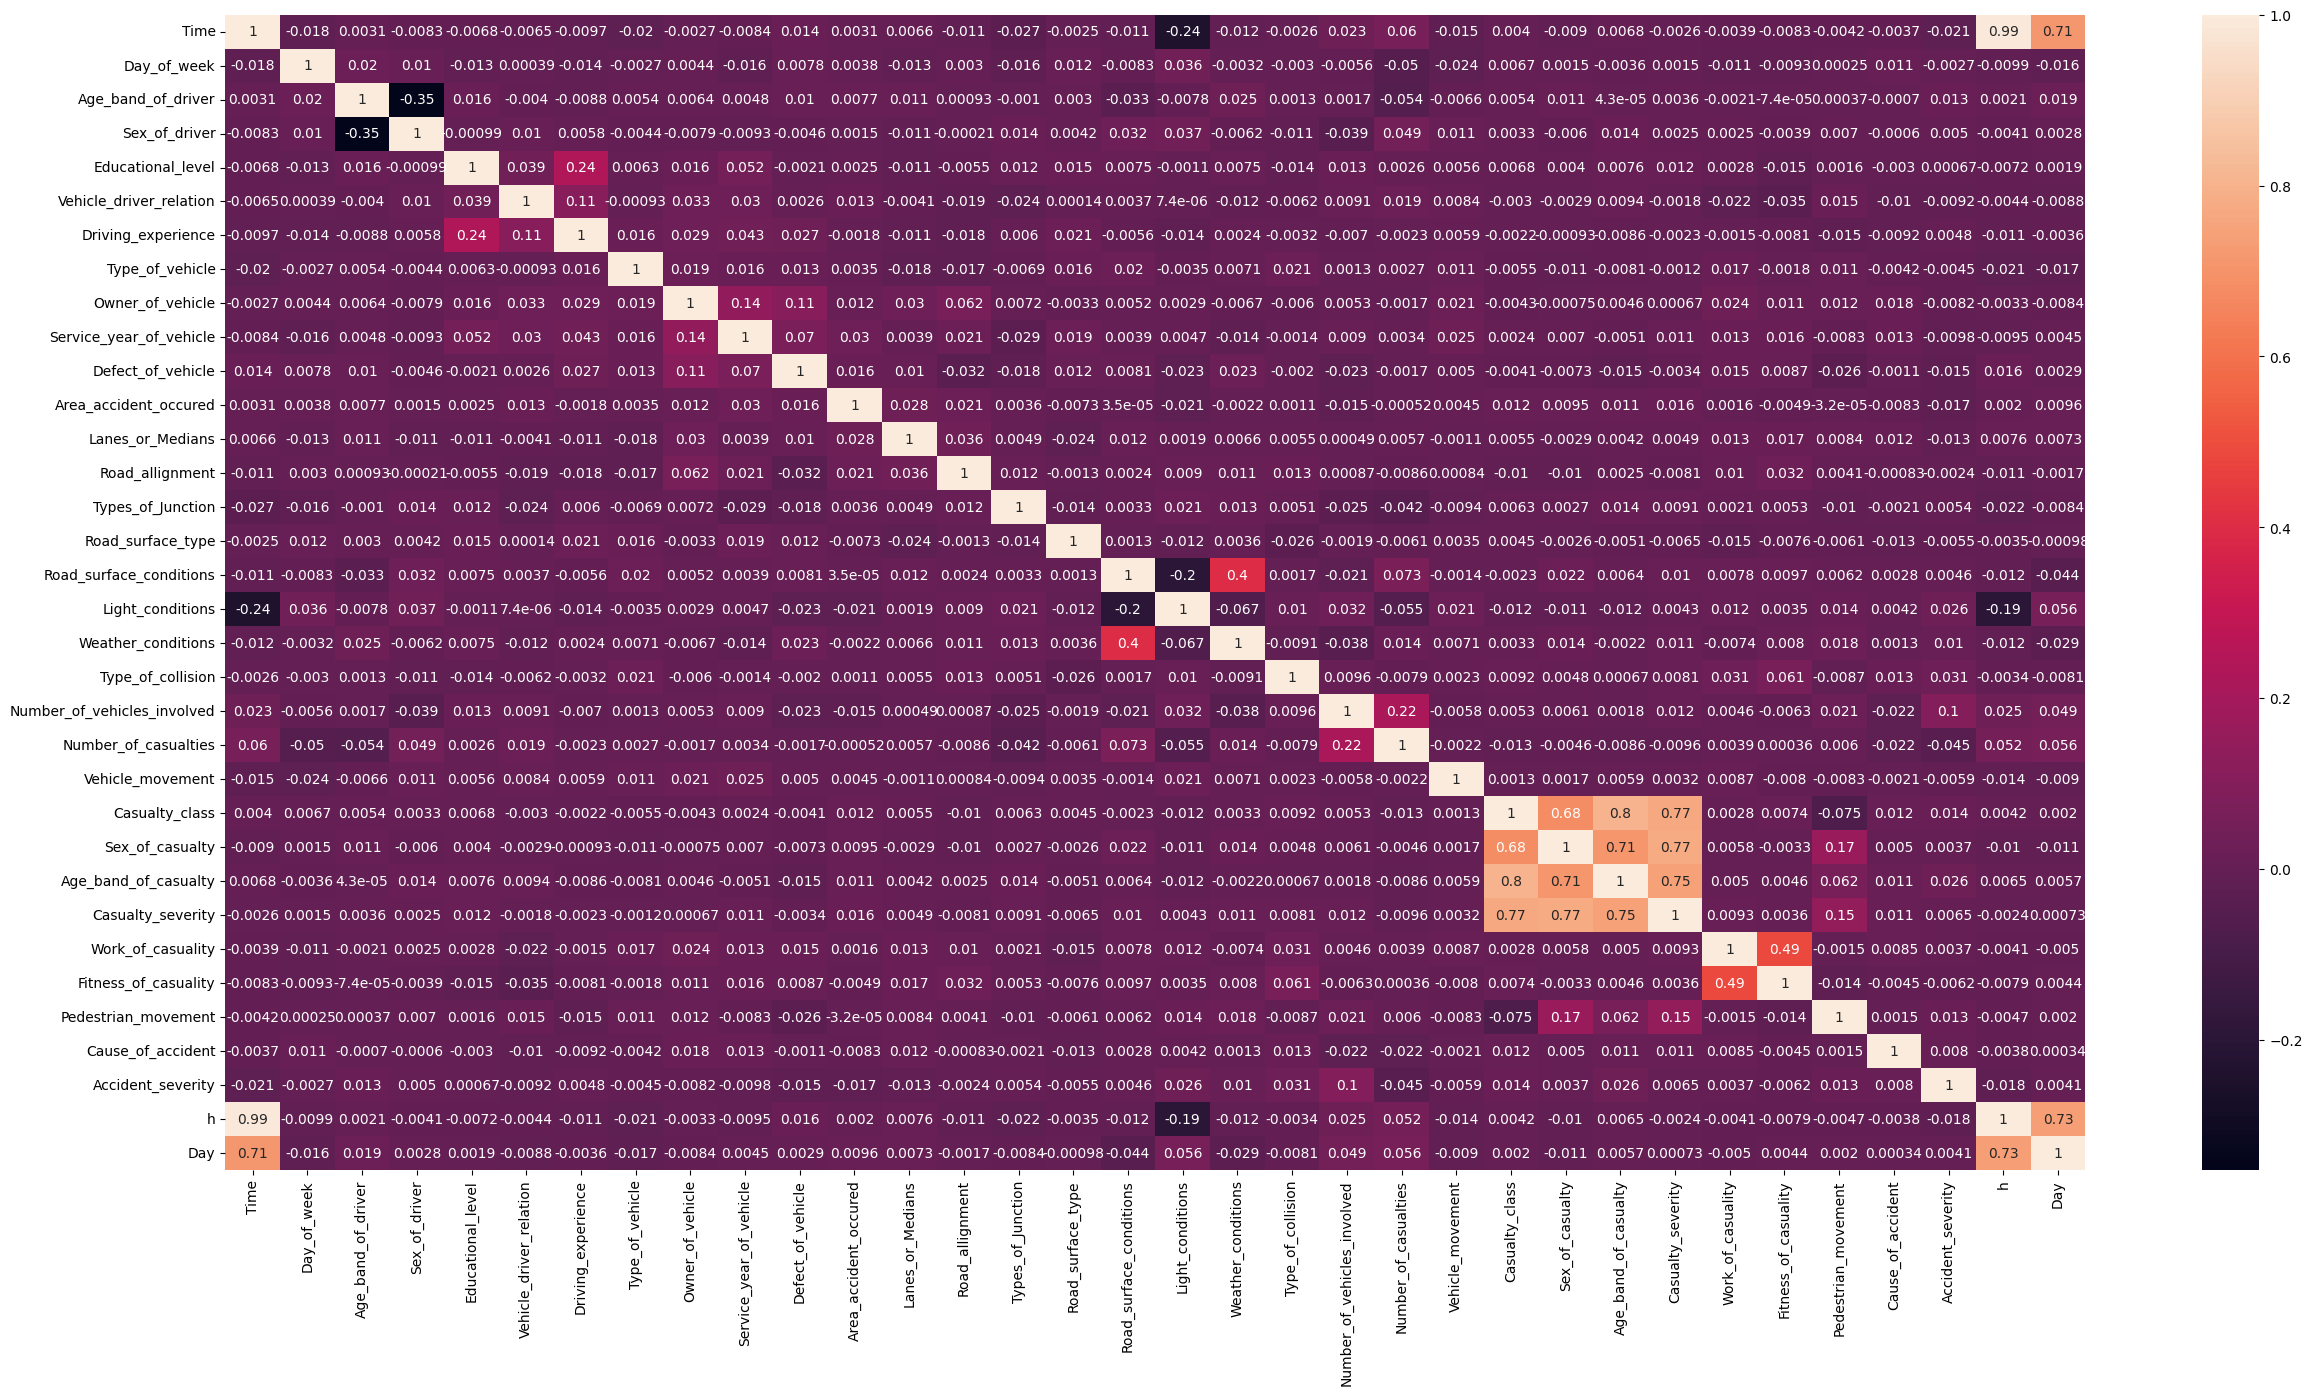

In [33]:
plt.figure(figsize=(30,15))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [34]:
x = data.drop(columns=['Accident_severity'])
y = data['Accident_severity']

x_train , x_test , y_train ,y_test = train_test_split(x ,y ,test_size=0.3 ,random_state=48)

In [35]:
DTC = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
DTC.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [36]:
train_score = DTC.score(x_train,y_train)
test_score = DTC.score(x_test,y_test)
print('train_score : ',train_score)
print('test_score : ',test_score)

train_score :  0.8534972740981325
test_score :  0.8435723951285521


In [37]:
y_pred = DTC.predict(x_test)

In [38]:
accuracy_score(y_test,y_pred)

0.8435723951285521

In [39]:
DTC.feature_importances_

array([0.1432929 , 0.06213132, 0.        , 0.        , 0.        ,
       0.0182699 , 0.        , 0.01534554, 0.        , 0.0469757 ,
       0.        , 0.        , 0.00904144, 0.01473156, 0.        ,
       0.        , 0.        , 0.04682557, 0.01775496, 0.0396535 ,
       0.34485117, 0.17799133, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01925196, 0.        ,
       0.01554368, 0.02833948, 0.        ])

<Axes: >

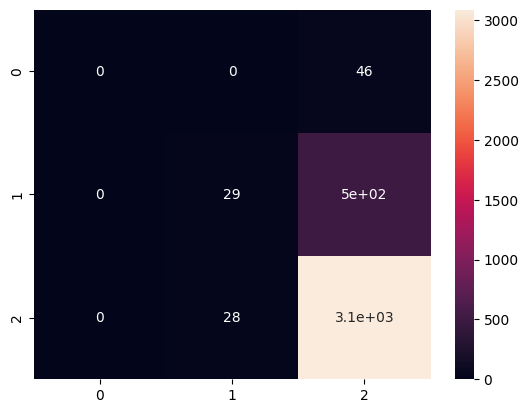

In [40]:
CM = confusion_matrix(y_test,y_pred)
sns.heatmap(CM,annot=True)

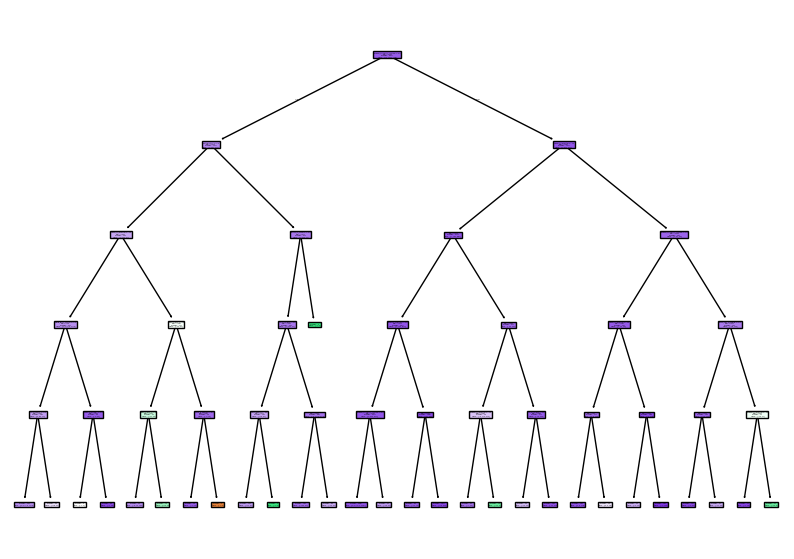

In [41]:
plt.figure(figsize=(10, 7))
plot_tree(DTC, filled=True, feature_names=x_train.columns.tolist())
plt.show()

In [42]:
LRM = LogisticRegression(penalty='l2',max_iter=100,solver='newton-cholesky')
LRM

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'newton-cholesky'
,max_iter,100
,multi_class,'deprecated'


In [43]:
LRM.fit(x_train,y_train)
LRM.score(x_train,y_train)

0.8466535204732629

In [44]:
LRM.score(x_test,y_test)

0.8433017591339648

In [45]:
y_pred = LRM.predict(x_test)
y_pred

array([2, 2, 2, ..., 2, 2, 2], shape=(3695,))

<Axes: >

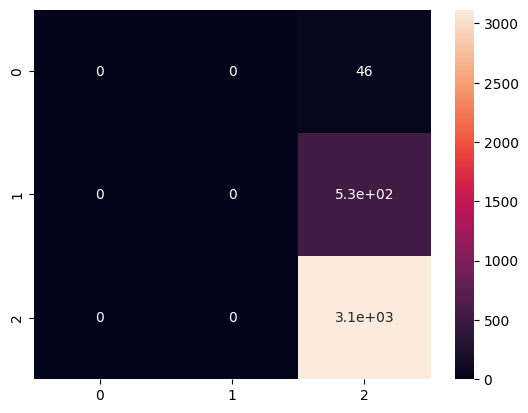

In [46]:
CM =confusion_matrix(y_test,y_pred)

sns.heatmap(CM,annot=True)